#### ADSD HOMEWORK 4 (Working with Chinook Database)
----

##### Connecting to the Chinook database

In [1]:
import sqlite3

conn = sqlite3.connect('data/Chinook_Sqlite.sqlite')

cursor = conn.cursor()


##### Verifying tables and relations

In [2]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
tables

[('Album',),
 ('Artist',),
 ('Customer',),
 ('Employee',),
 ('Genre',),
 ('Invoice',),
 ('InvoiceLine',),
 ('MediaType',),
 ('Playlist',),
 ('PlaylistTrack',),
 ('Track',)]

##### Displaying ER image (created using grapviz)

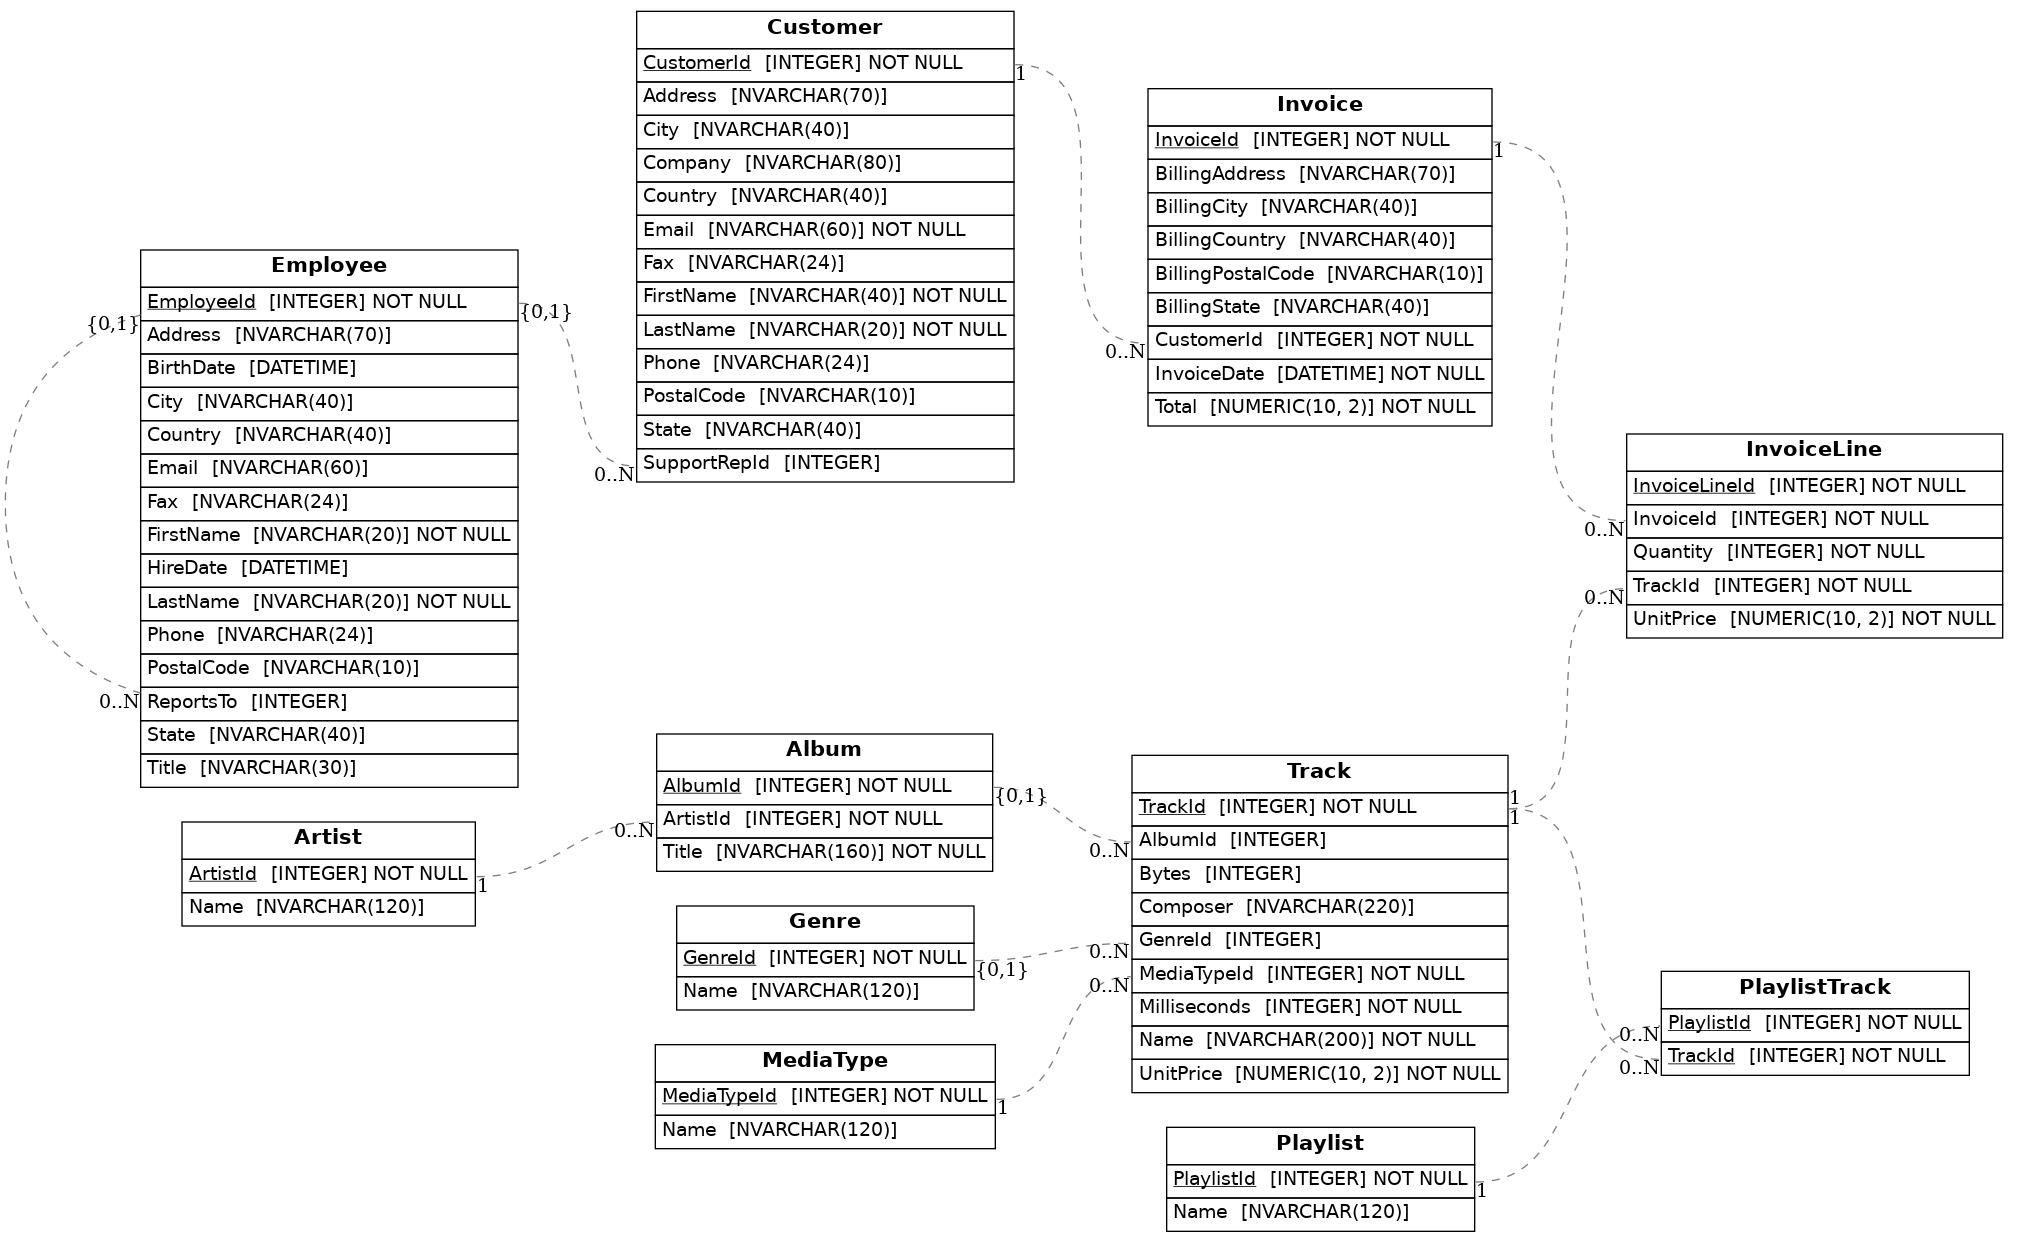

In [4]:
from IPython.display import Image
Image(filename='er_diagram.png')

#### 2. Try some queries to verify that the tables and relations are working. 

i. Showing data from few tables

In [11]:
import pandas as pd
from IPython.display import display

# List of important tables to display
important_tables = ['album', 'artist', 'customer', 'track', 'invoice']  # Add or modify this list as needed

for table_name in important_tables:
    print(f"Table: {table_name}")
    
    # Fetch column names
    cursor.execute(f"PRAGMA table_info('{table_name}');")
    columns = [column[1] for column in cursor.fetchall()]
    
    # Select one entry from each table
    cursor.execute(f"SELECT * FROM {table_name} LIMIT 1;")
    row = cursor.fetchone()
    
    if row:
        # Create a DataFrame from the row with column names
        df = pd.DataFrame([row], columns=columns)
        
        # Display the DataFrame neatly with a grid format
        display(df)
    else:
        print(f"No data found in {table_name}")


Table: album


,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1


Table: artist


,ArtistId,Name
0,1,AC/DC


Table: customer


,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3


Table: track


,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99


Table: invoice


,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
